In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [54]:
from shapely.geometry import Point

<Axes: >

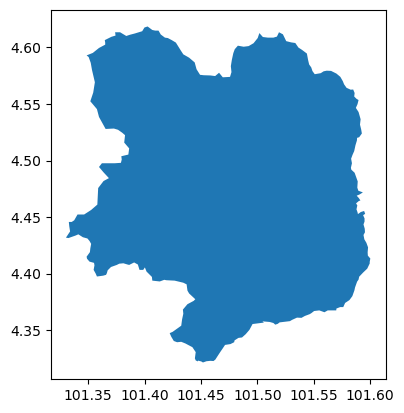

In [5]:
SA1= gpd.read_file('Study_Area_1.shp')
SA1.plot()

<Axes: >

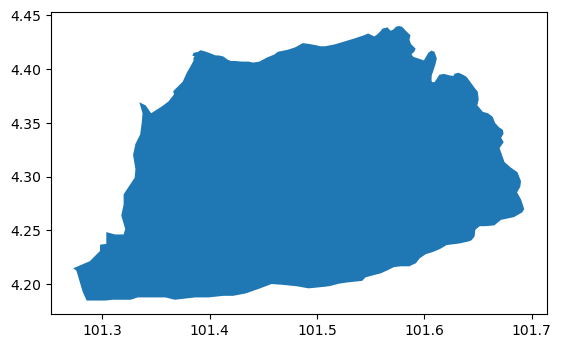

In [6]:
SA2= gpd.read_file('Study_Area_2.shp')
SA2.plot()

<Axes: >

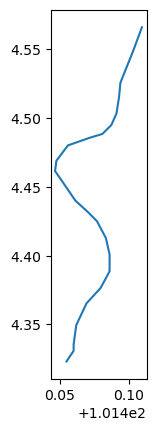

In [34]:
river=gpd.read_file('river.shp')
river.plot()

<Axes: >

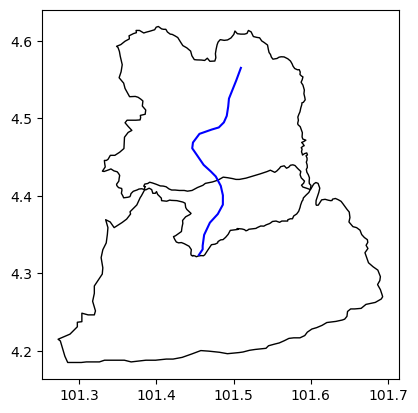

In [13]:
fig, ax= plt.subplots()
SA1.plot(ax=ax, color='none', edgecolor='black')
SA2.plot(ax=ax, color='none',edgecolor='black')
river.plot(ax=ax, color='blue',edgecolor='black')

<Axes: >

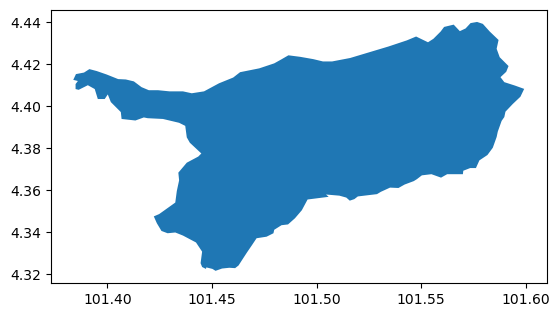

In [15]:
#Intersection of Polygons
intersection= gpd.overlay(SA1, SA2, how='intersection')
intersection.plot()

<Axes: >

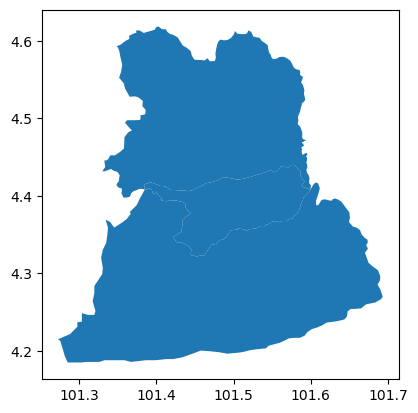

In [16]:
#union of Polygons
union= gpd.overlay(SA1, SA2, how='union')
union.plot()

<Axes: >

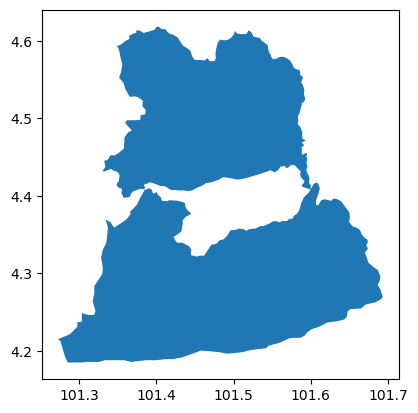

In [17]:
#symmetric difference between polygons
sd= gpd.overlay(SA1, SA2, how='symmetric_difference')
sd.plot()

<Axes: >

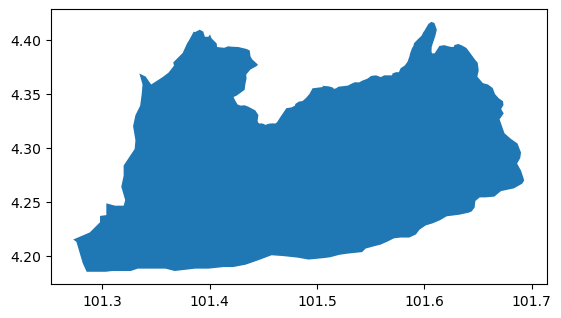

In [19]:
# difference between polygons
difference= gpd.overlay(SA2, SA1, how='difference')
difference.plot()

<Axes: >

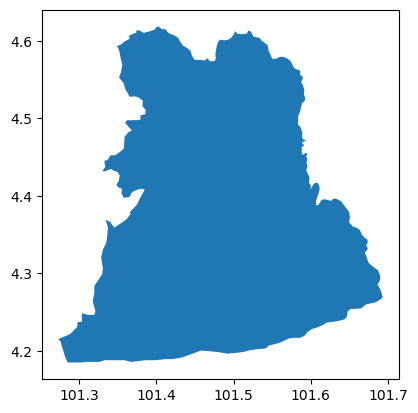

In [24]:
#dissolve
union['common_col']=1
dissolved= union.dissolve(by='common_col')
dissolved.plot()

<Axes: >

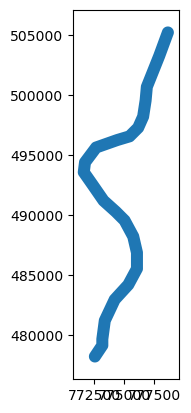

In [40]:
# buffer
#Reprojecting into projected coordinate system
river_projected= river.to_crs(epsg=24547)
buffer_500 = river_projected['geometry'].buffer(distance= 500)
buffer_500.plot()

C:\Users\user\AppData\Local\Temp\ipykernel_10740\3544678653.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid= union['geometry'].centroid


<Axes: >

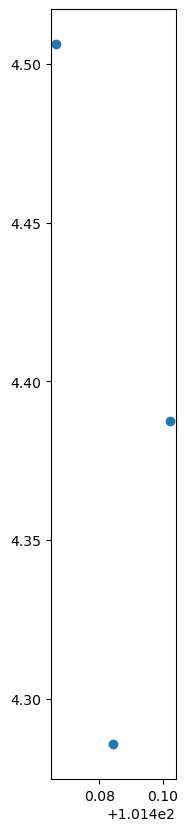

In [45]:
#Determinig the centroid of polygon
centroid= union['geometry'].centroid
centroid.plot(figsize=(10,10))

<Axes: >

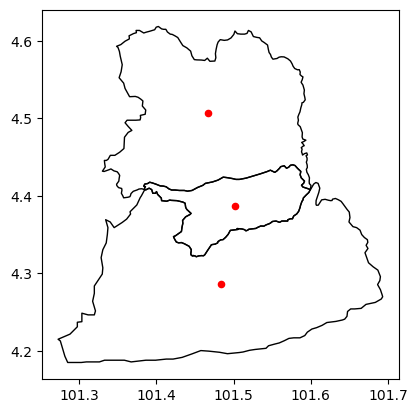

In [47]:
#merging centroid and polygon
fig, ax= plt.subplots()
union.plot(ax=ax, edgecolor='black', color='none')
centroid.plot(ax=ax, markersize=20,color='red')

In [57]:
#Csv file coordinates to geometry
airports_data= pd.read_csv('us_airports.csv')
geometry= [Point(xy) for xy in zip(airports_data['LONGITUDE'], airports_data['LATITUDE'])]


<Axes: >

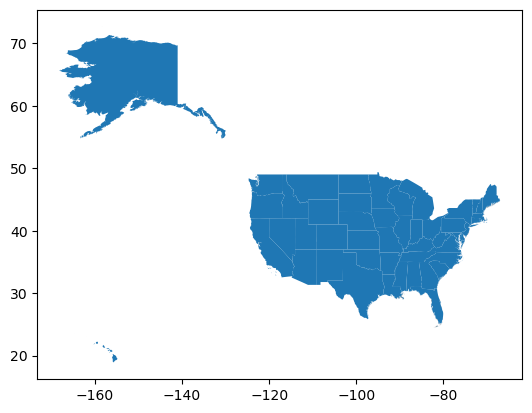

In [60]:
#importing states shapefile
us_states=gpd.read_file('us_states.shp')
us_states.plot()

<Axes: >

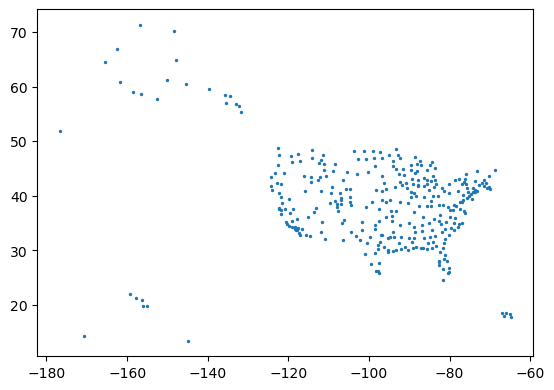

In [65]:
#Creating geodataframe
airports_us = gpd.GeoDataFrame(airports_data,geometry= geometry, crs= us_states.crs)
airports_us.plot(markersize=2)

In [70]:
airports_us.columns

Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
       'geometry'],
      dtype='object')

In [73]:
#Attribute Join
states= pd.read_csv('state names and codes.csv')
#Renaming the column name
airports_us.rename(columns= {"STATE":"state_code"}, inplace= True)

In [79]:
#Joining by Attributes
airports_us = airports_us.merge(states, on= 'state_code')
airports_us

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry,state_name_x,state_name_y
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022),New Mexico,New Mexico
1,HOB,Lea County Regional,Hobbs,NM,USA,32.687528,-103.217028,POINT (-103.21703 32.68753),New Mexico,New Mexico
2,ROW,Roswell Industrial Air Center,Roswell,NM,USA,33.301556,-104.530556,POINT (-104.53056 33.30156),New Mexico,New Mexico
3,SAF,Santa Fe Municipal,Santa Fe,NM,USA,35.616778,-106.088139,POINT (-106.08814 35.61678),New Mexico,New Mexico
4,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453),Texas,Texas
...,...,...,...,...,...,...,...,...,...,...
150,RKS,Rock Springs-Sweetwater County,Rock Springs,WY,USA,41.594217,-109.065193,POINT (-109.06519 41.59422),Wyoming,Wyoming
151,CRW,Yeager,Charleston,WV,USA,38.373151,-81.593190,POINT (-81.59319 38.37315),West Virginia,West Virginia
152,HTS,Tri-State Walker-Long,Huntington,WV,USA,38.366667,-82.558028,POINT (-82.55803 38.36667),West Virginia,West Virginia
153,LWB,Greenbrier Valley,Lewisburg,WV,USA,37.858306,-80.399472,POINT (-80.39947 37.85831),West Virginia,West Virginia


<Axes: >

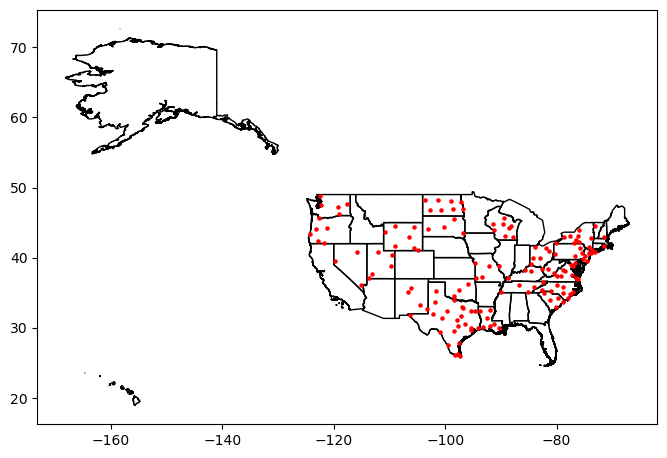

In [87]:
airport_us= airports_us[['AIRPORT','geometry']]
fig, ax= plt.subplots(figsize=(8,8))
us_states.plot(ax=ax, color='none', edgecolor='black')
airport_us.plot(ax=ax, color='red', markersize=5)

In [94]:
#spatial join
airport_us= gpd.sjoin(airport_us, us_states, how='inner')

ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined